## Intoduction:
    Though treatment has advanced tremendously, the prevalence of heart disease has continued to rise in lower-income communities, contributing to the pervasiveness of cardiovascular disease as a leading cause of premature death (Bowry et al. 1151). Similarly, this trend is reflected in Canada, with the 11.3% increase in adults with cardiovascular disease occurring mostly in lower income areas despite the overall decline of heart disease in the general population in 2016 (Dai et al. 2). Therefore, there exists a push for more efficient  methods of diagnosing individuals at high risk of heart disease. Consequently, we aim to ascertain the severity of heart disease for unique individuals by analyzing a list of attributes taken from a dataset from Cleveland Clinic Foundation. (Detrano et al. 305) The raw dataset was refined by David W. Aha to create the processed dataset that we will utilize. (UCI Machine Learning Repository: Heart Disease Data Set) 
    This dataset contains 14 attributes of which we isolated six for the purposes of our analysis namely, 
* age in years, 
* sex, 
* resting blood pressure (trestbps), 
* chest pain type (cp), 
* number of major blood vessels coloured by fluoroscopy (ca) 
* the diagnosis of heart disease (num). 


Loading the libraries needed for data analysis.

In [70]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Downloading dataset from the Web and reading into a dataframe.

In [71]:
my_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
download.file(my_url, "cleveland.csv")
cleveland_sel <- read_csv("cleveland.csv", col_names = FALSE)
cleveland_sel <- rename(cleveland_sel, "age" = X1,
                     "sex" = X2,
                     "cp" = X3,
                     "trestbps" = X4,
                     "chol" = X5,
                     "fbs" = X6,
                     "restecg" = X7,
                     "thalach" = X8,
                     "exnag" = X9,
                     "oldpeak" = X10,
                     "slope" = X11,
                     "ca" = X12,
                     "thal" = X13,
                     "num" = X14)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



In [83]:
cleveland_df_sel<-select(cleveland_sel,age, sex, cp, trestbps, ca, num)
cleveland_df_sel

age,sex,cp,trestbps,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
63,1,1,145,0.0,0
67,1,4,160,3.0,2
67,1,4,120,2.0,1
⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,1.0,3
57,0,2,130,1.0,1
38,1,3,138,?,0


In [84]:
cleveland_df_self <- filter(cleveland_df_sel, ca != "?") 
cleveland_df_self


age,sex,cp,trestbps,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
63,1,1,145,0.0,0
67,1,4,160,3.0,2
67,1,4,120,2.0,1
⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,2.0,2
57,1,4,130,1.0,3
57,0,2,130,1.0,1


In [85]:
num_Patients_male <- filter(cleveland_df_self, sex == 1) %>%  nrow()
num_Patients_male
num_Patients_famale <- filter(cleveland_df_self, sex == 0) %>%  nrow()
num_Patients_famale

[1] 202

[1] 97

In [86]:
#num_patience<-nrow(cleveland_df_sel)
#num_patience

num_Patients <- cleveland_df_self %>% summarize(n_patients = n())
num_Patients

n_patients
<int>
299


In [87]:
n_each_gender <- cleveland_df_self %>% group_by(sex) %>% summarize(n= n())

n_each_gender <- pivot_wider(n_each_gender, names_from = sex, values_from = n)

n_each_gender <- 
        rename(n_each_gender, 
              "female" = "0",
              "male" = "1") %>% mutate("female" = as.character(female), "male" = as.character(male))

n_each_gender <- pivot_longer(n_each_gender, cols = female:male, names_to = "Sex", values_to = "n") %>% mutate(n = as.numeric(n))

n_each_gender 


`summarise()` ungrouping output (override with `.groups` argument)



Sex,n
<chr>,<dbl>
female,97
male,202


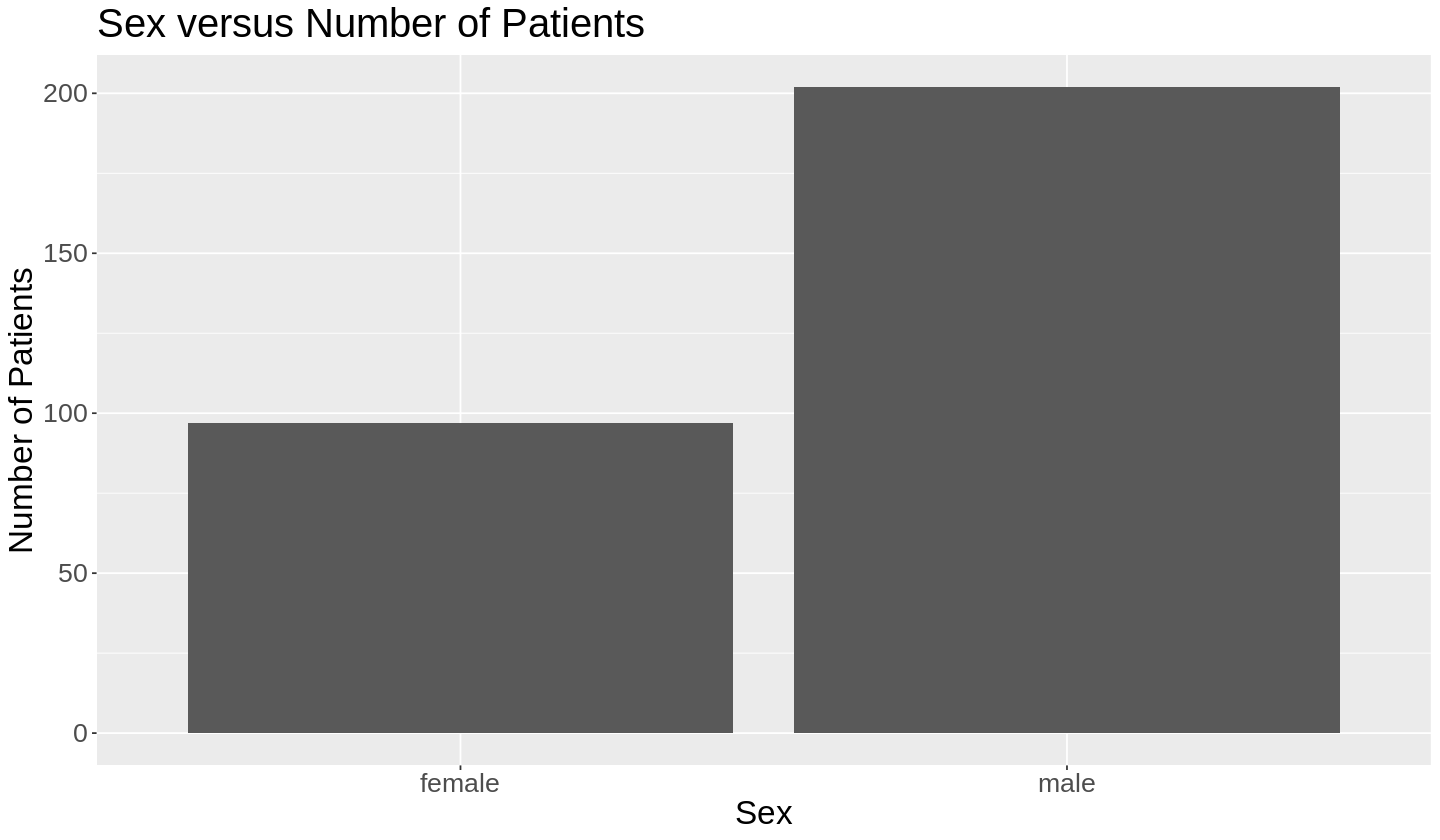

In [88]:
sex_bar<- ggplot(n_each_gender, aes(x = Sex, y = n)) + 
    geom_bar(stat = "identity") +
    xlab("Sex") +
    ylab("Number of Patients")+
    theme(text = element_text(size = 20))+ 
    ggtitle("Sex versus Number of Patients")

sex_bar

In [89]:

mean_age <- cleveland_df_self %>% group_by(sex) %>% summarize(avg = mean(age))

mean_age <- pivot_wider(mean_age, names_from = sex, values_from = avg)

mean_age <- 
        rename(mean_age, 
              "female" = "0",
              "male" = "1") %>% mutate("female" = as.character(female), "male" = as.character(male))

mean_age <- pivot_longer(mean_age, cols = female:male, names_to = "sex", values_to = "avg_age") %>% mutate(avg_age = as.numeric(avg_age))

mean_age


`summarise()` ungrouping output (override with `.groups` argument)



sex,avg_age
<chr>,<dbl>
female,55.72165
male,53.95545


In [90]:
n_chest_pain <- cleveland_df_self %>% group_by(cp) %>% summarize(n = n())

n_chest_pain <- pivot_wider(n_chest_pain, names_from = cp, values_from = n)

n_chest_pain <- 
        rename(n_chest_pain, 
              "typical_angina" = "1",
              "atypical_angina" = "2", "Non_anginal_pain" = "3", "Asymptomatic" = "4") #%>% mutate("female" = as.character(female), "male" = as.character(male))

n_chest_pain <- pivot_longer(n_chest_pain, cols = typical_angina:Asymptomatic, names_to = "chest_pain", values_to = "n") %>% mutate(n = as.numeric(n))


n_chest_pain


`summarise()` ungrouping output (override with `.groups` argument)



chest_pain,n
<chr>,<dbl>
typical_angina,23
atypical_angina,49
Non_anginal_pain,84
Asymptomatic,143


In [91]:
young_adult_bps <- cleveland_df_self %>%
select(age,trestbps) %>%
filter(between(age,18, 35))

middle_adult_bps <- cleveland_df_self %>%
select(age,trestbps) %>%
filter(between(age,36, 55))

old_adult_bps <- cleveland_df_self %>%
select(age, trestbps) %>%
filter(between(age,55,77))

max_young_trestbps <- young_adult_bps %>% 
    arrange(desc(trestbps))%>% 
    head(n=1)

min_young_trestbps <- young_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    tail(n=1)

max_middle_trestbps <- middle_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    head(n=1)

min_middle_trestbps <- middle_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    tail(n=1)

max_old_trestbps <- old_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    head(n=1)

min_old_trestbps <- old_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    tail(n=1)


max_young_trestbps
min_young_trestbps

max_middle_trestbps
min_middle_trestbps

max_old_trestbps
min_old_trestbps


age,trestbps
<dbl>,<dbl>
35,138


age,trestbps
<dbl>,<dbl>
34,118


age,trestbps
<dbl>,<dbl>
54,192


age,trestbps
<dbl>,<dbl>
39,94


age,trestbps
<dbl>,<dbl>
56,200


age,trestbps
<dbl>,<dbl>
58,100


In [92]:
mean_rbp <- cleveland_df_self %>% group_by(ca) %>% summarize(avg_rbp = mean(trestbps))
mean_rbp

`summarise()` ungrouping output (override with `.groups` argument)



ca,avg_rbp
<chr>,<dbl>
0.0,130.9545
1.0,129.6308
2.0,135.7105
3.0,136.9000


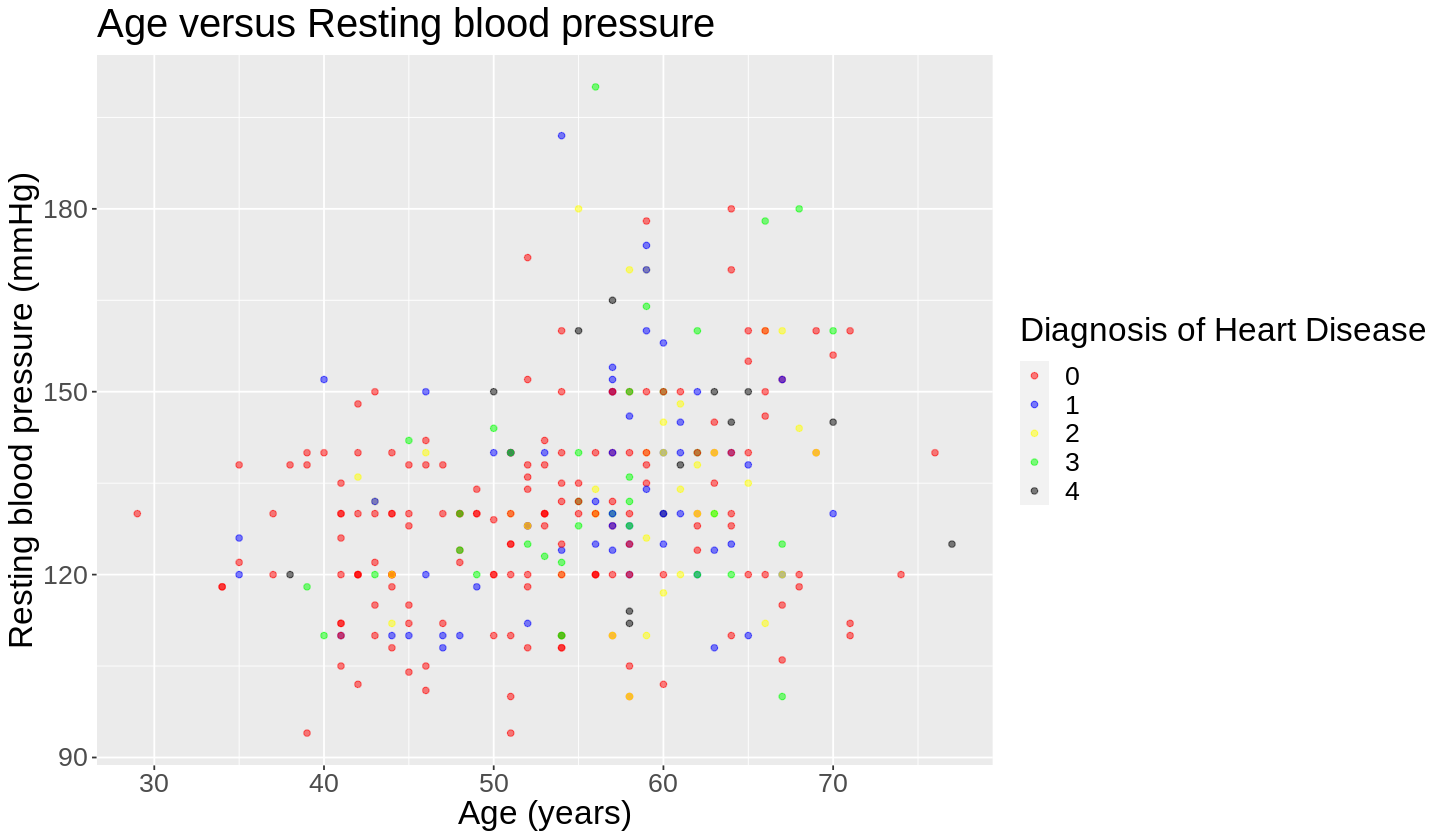

In [93]:
options(repr.plot.width = 12, repr.plot.height = 7)

age_vs_rbps_plot <- ggplot(cleveland_df_sel, aes(x = age, y = trestbps, color = as_factor(num))) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Age (years)", y = "Resting blood pressure (mmHg)", color = "Diagnosis of Heart Disease") +
                    theme(text = element_text(size = 20)) + 
                    ggtitle("Age versus Resting blood pressure") +
                    scale_color_manual(labels = c("0", "1","2","3","4"), values = c("red","blue","yellow","green","black"))
age_vs_rbps_plot